In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv("/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv")
data.head(3)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3


In [3]:
data.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [4]:
data.dtypes

student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object

In [5]:
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [6]:
data.shape

(1000, 16)

In [7]:
data.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [8]:
data['parental_education_level'].unique()

array(['Master', 'High School', 'Bachelor', nan], dtype=object)

In [9]:
data['parental_education_level'].value_counts(dropna=False)

parental_education_level
High School    392
Bachelor       350
Master         167
NaN             91
Name: count, dtype: int64

In [10]:
data['parental_education_level'].fillna(data['parental_education_level'].mode()[0], inplace=True)

/tmp/ipykernel_13/1574994182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['parental_education_level'].fillna(data['parental_education_level'].mode()[0], inplace=True)


In [11]:
data['parental_education_level'].value_counts(dropna=False)

parental_education_level
High School    483
Bachelor       350
Master         167
Name: count, dtype: int64

## UNIVARIATE ANALYSIS

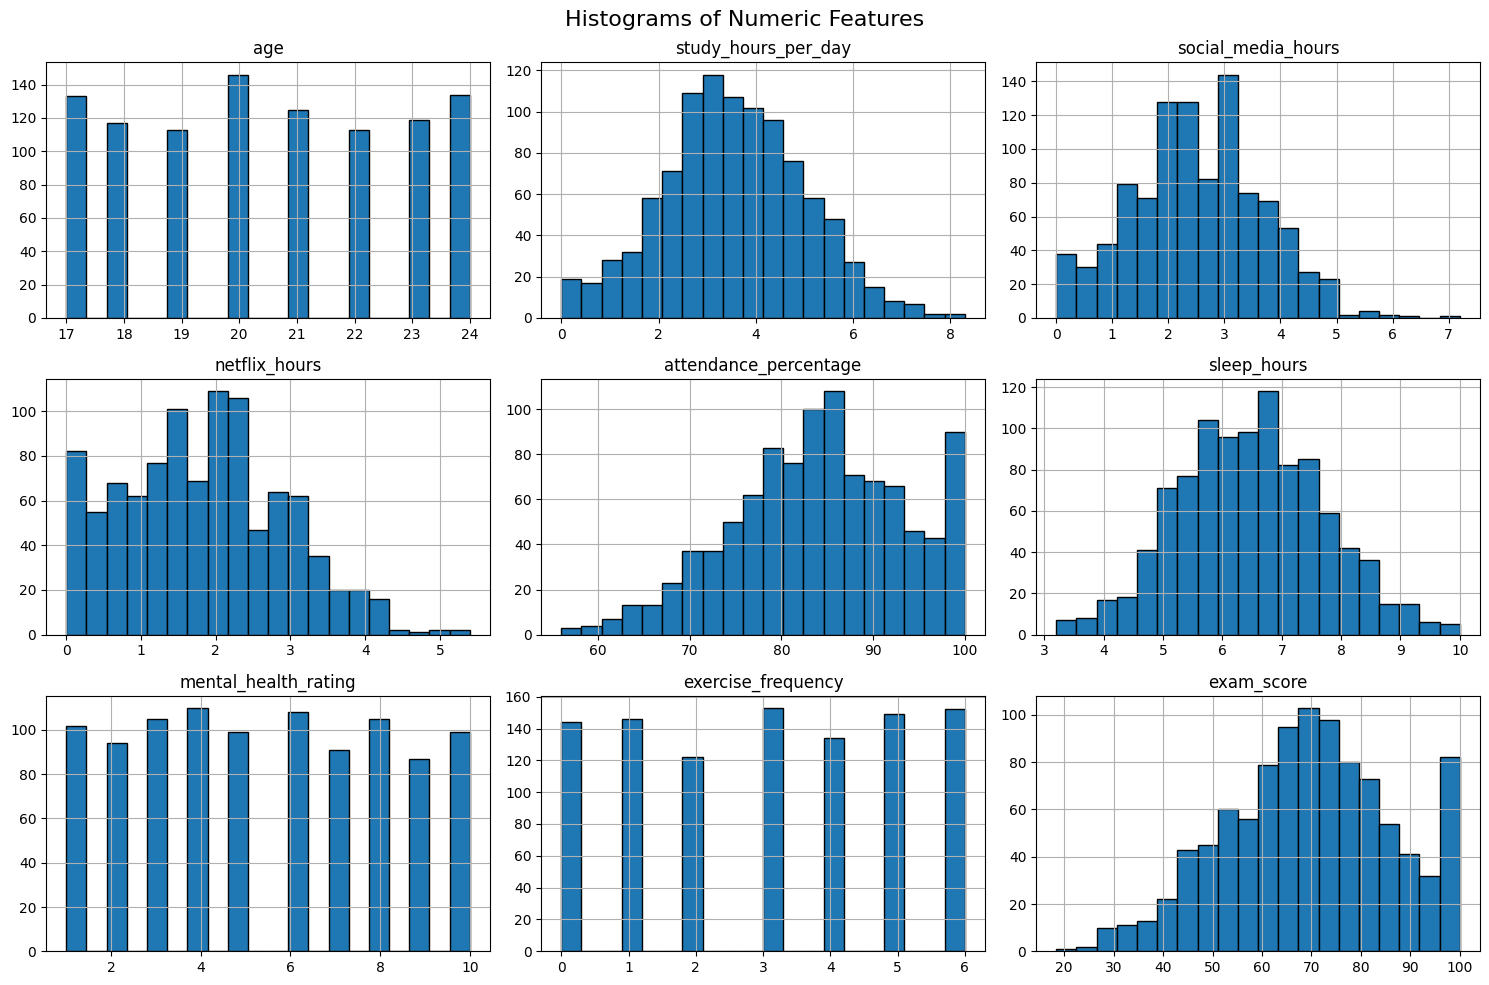

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features

numeric_cols = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'mental_health_rating', 'exercise_frequency', 'exam_score']

data[numeric_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
data.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [14]:
data['study_hours_per_day'].value_counts()

study_hours_per_day
3.5    38
3.2    36
4.3    35
3.3    34
3.8    31
       ..
7.5     1
8.2     1
7.6     1
0.1     1
7.1     1
Name: count, Length: 78, dtype: int64

In [15]:
data['exercise_frequency'].value_counts()

exercise_frequency
3    153
6    152
5    149
1    146
0    144
4    134
2    122
Name: count, dtype: int64

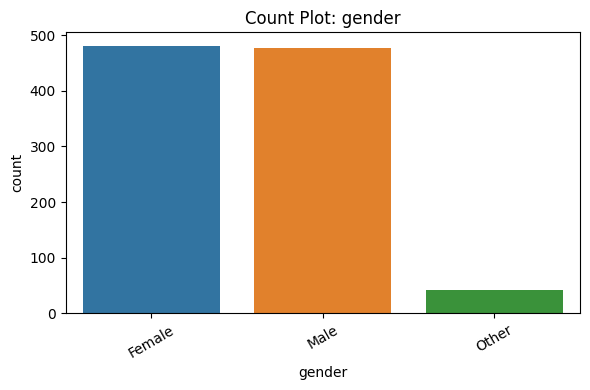

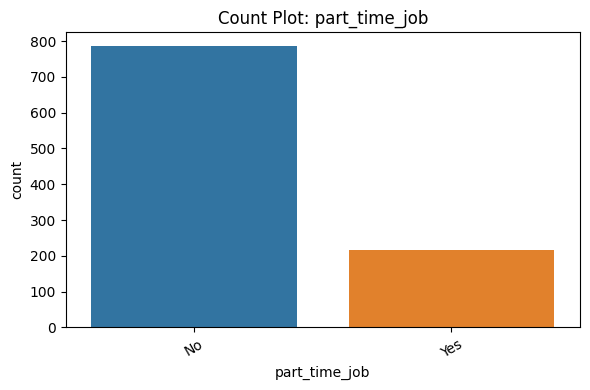

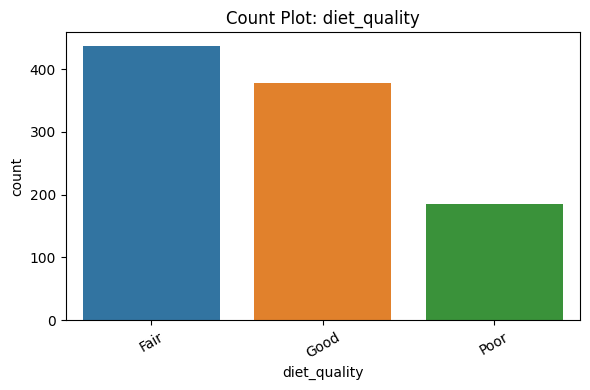

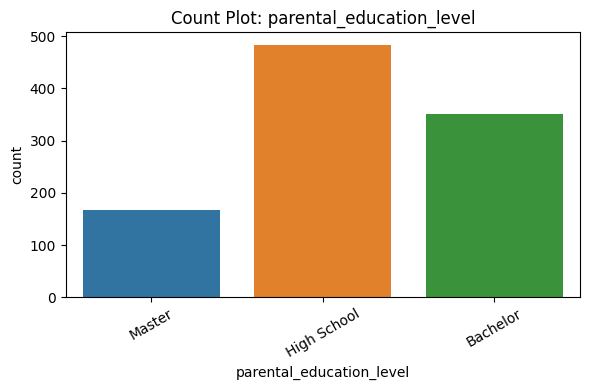

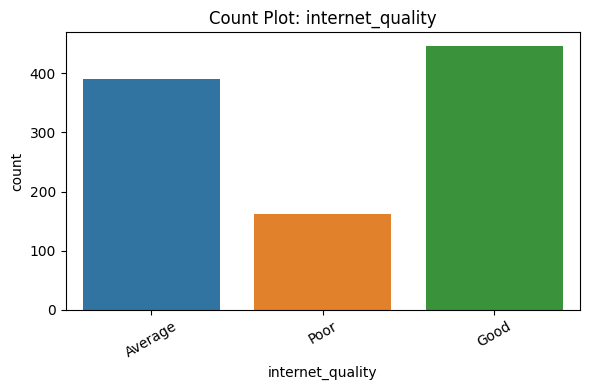

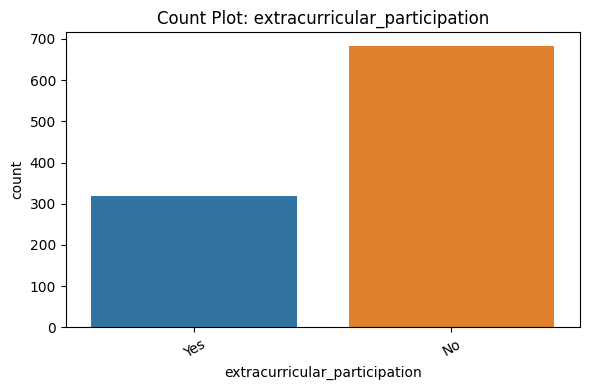

In [16]:
# count plots for categorical features

categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col)
    plt.title(f'Count Plot: {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show

## Bivariate Analysis (Feature vs Exam Score)

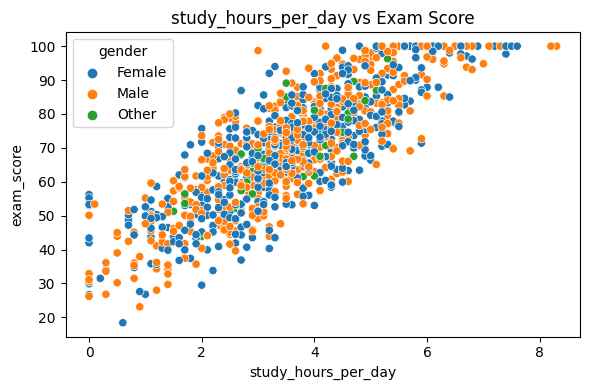

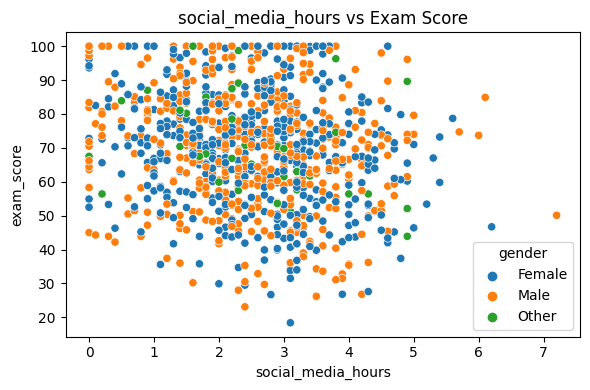

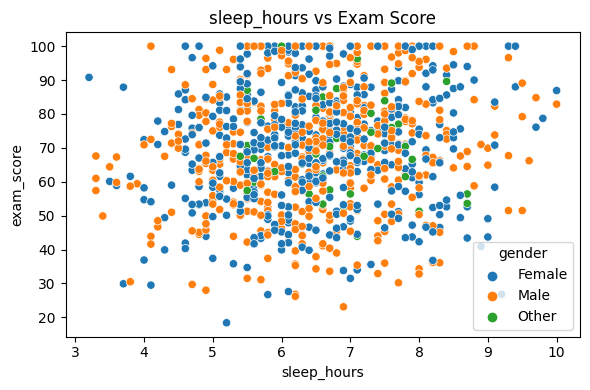

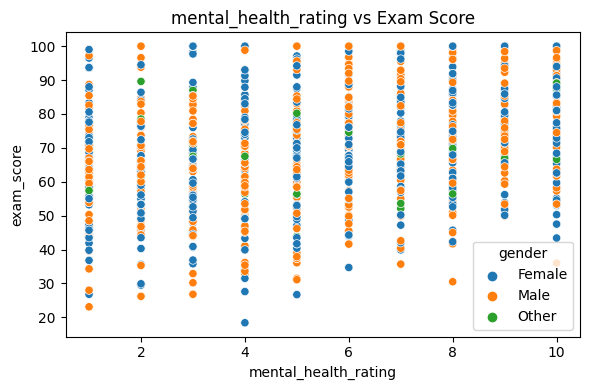

In [17]:
# Numerical vs exam score

for col in ['study_hours_per_day', 'social_media_hours', 'sleep_hours', 'mental_health_rating']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=data, x=col, y='exam_score', hue='gender')
    plt.title(f'{col} vs Exam Score')
    plt.tight_layout()
    plt.show()

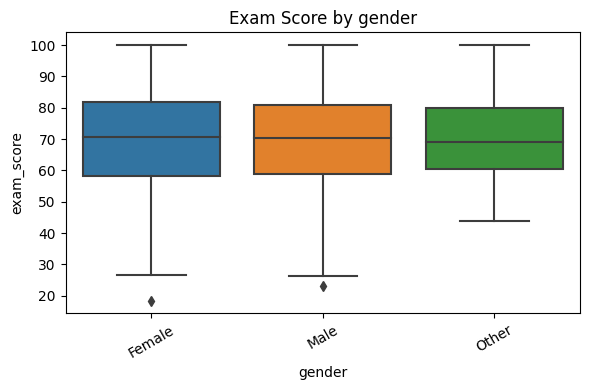

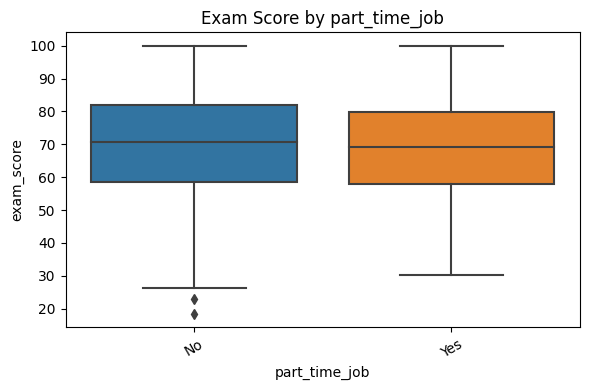

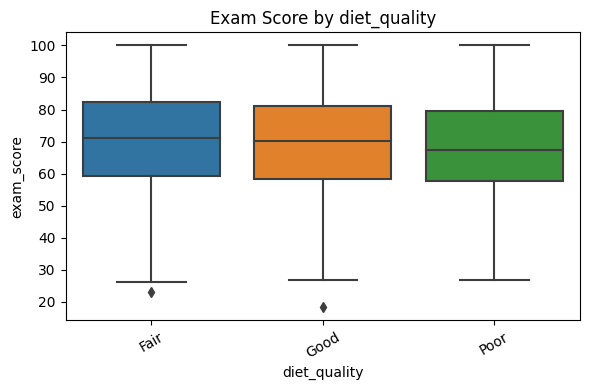

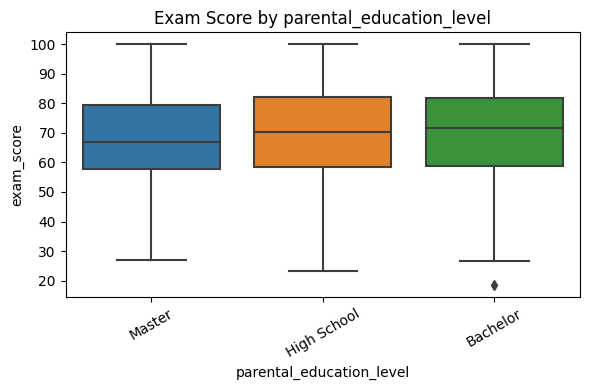

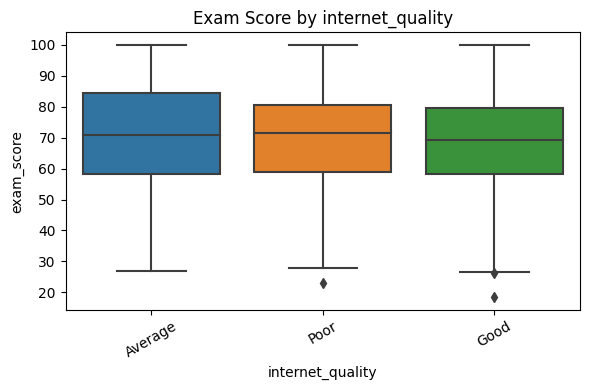

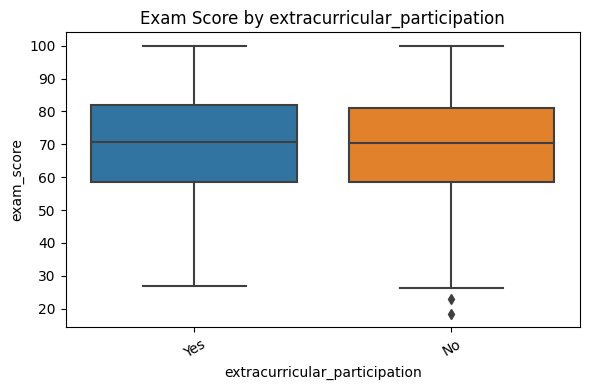

In [18]:
# Categorical vs Exam Score

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=data, x=col, y='exam_score')
    plt.title(f'Exam Score by {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

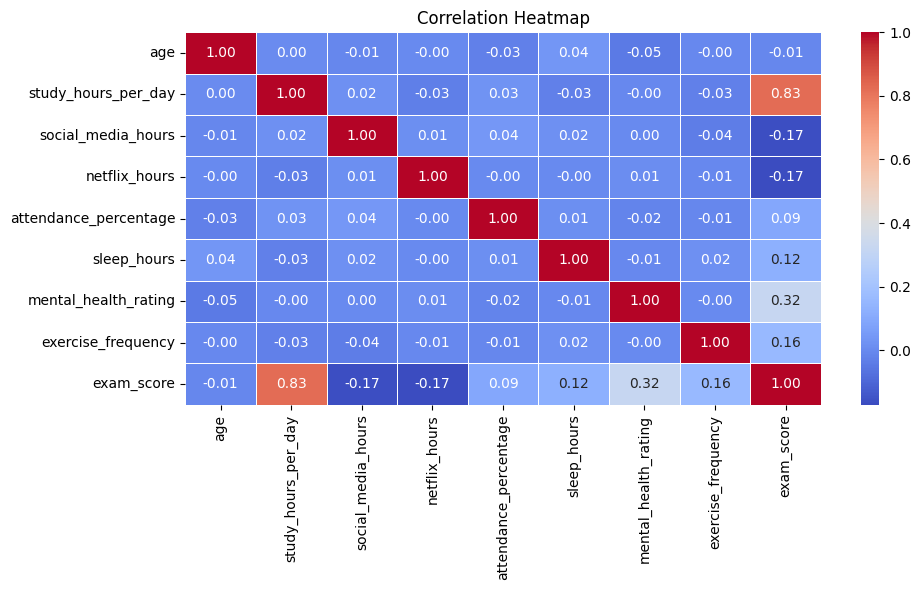

In [19]:
# Correlation Heatmap

plt.figure(figsize=(10,6))
correlation=data[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [20]:
# Correlation with exam_score

cor_with_score = data.corr(numeric_only=True)['exam_score'].sort_values(ascending=False)
print("\nCorrelation with Exam Score:")
print(cor_with_score)


Correlation with Exam Score:
exam_score               1.000000
study_hours_per_day      0.825419
mental_health_rating     0.321523
exercise_frequency       0.160107
sleep_hours              0.121683
attendance_percentage    0.089836
age                     -0.008907
social_media_hours      -0.166733
netflix_hours           -0.171779
Name: exam_score, dtype: float64


In [21]:
# Pairplot

# selected_cols = ['exam_score', 'study_hours_per_day', 'social_media_hours', 'sleep_hours', 'mental_health_rating']
# sns.pairplot(data[selected_cols], diag_kind='kde')
# plt.suptitle("Pairplot of Selected Features", y=1.02)
# plt.show()

## Outlier Detection

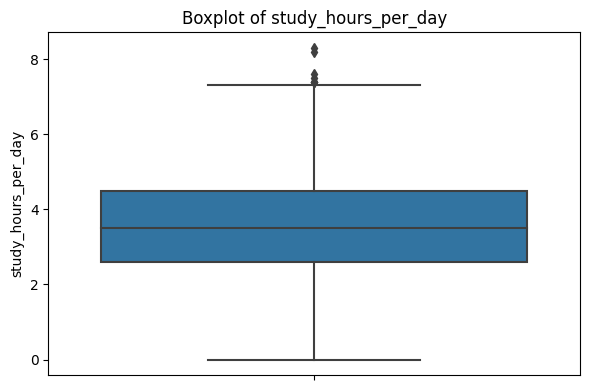

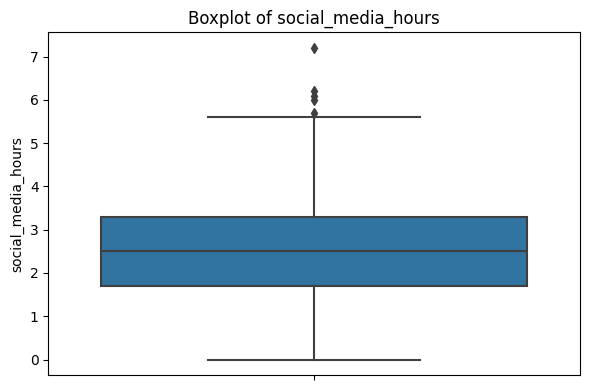

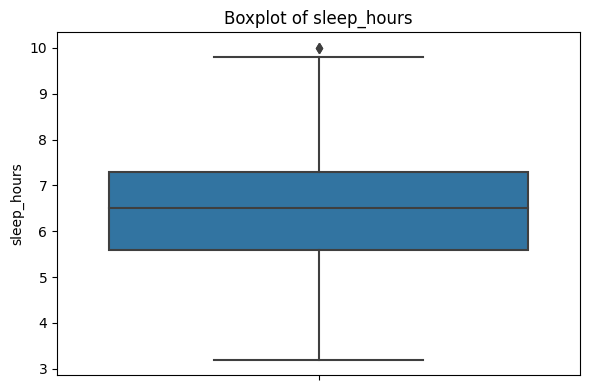

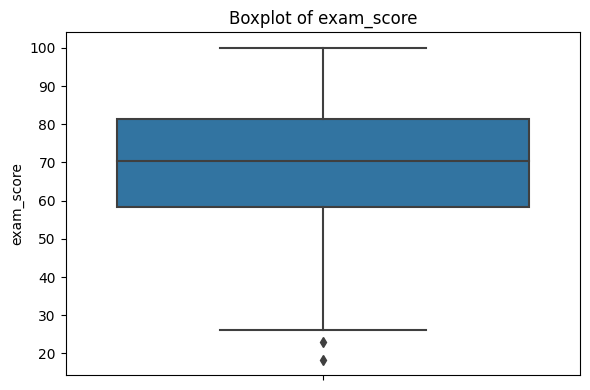

In [22]:
# Boxplots to check outliers

for col in ['study_hours_per_day', 'social_media_hours', 'sleep_hours', 'exam_score']:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

## Feature Engineering

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


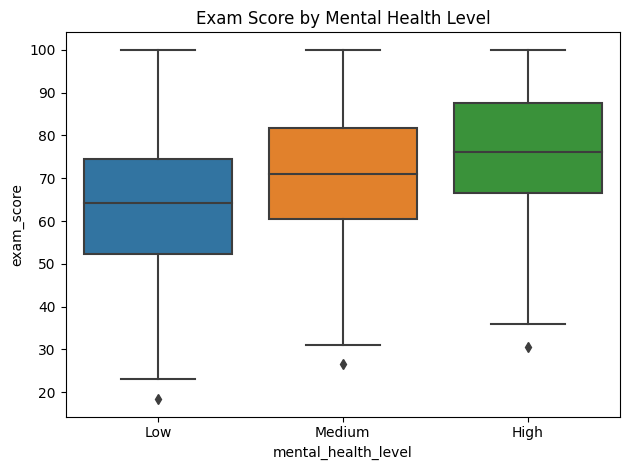

In [23]:
# Create total leisure time
data['leisure_hours'] = data['social_media_hours'] + data['netflix_hours']

# categorize mental health rating
data['mental_health_level'] = pd.cut(data['mental_health_rating'],
                                    bins=[0, 4, 7, 10],
                                    labels=['Low', 'Medium', 'High'])

# Visualize new features
sns.boxplot(data=data, x='mental_health_level', y='exam_score')
plt.title("Exam Score by Mental Health Level")
plt.tight_layout()
plt.show()

In [24]:
data.sample(3)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,leisure_hours,mental_health_level
914,S1914,20,Female,2.6,1.6,1.3,Yes,87.4,5.2,Good,6,Bachelor,Poor,10,No,72.9,2.9,High
470,S1470,21,Female,4.2,2.9,2.5,No,69.7,6.4,Fair,1,High School,Good,1,No,60.4,5.4,Low
581,S1581,17,Male,3.2,3.1,2.4,No,91.3,6.7,Fair,3,High School,Average,3,No,68.5,5.5,Low


## 1. Does More Study Time always Mean Better Scores?

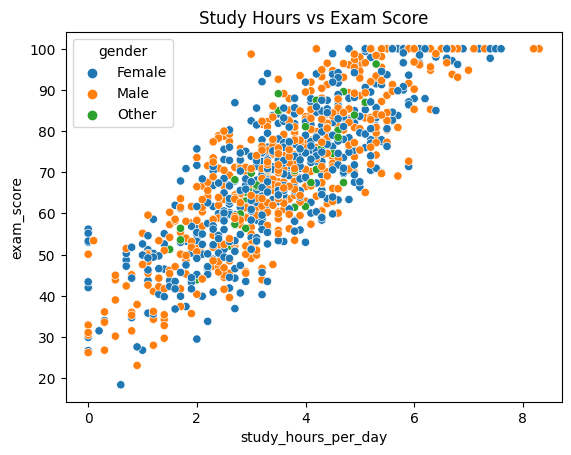

Correlation: 0.825418509396044


In [25]:
sns.scatterplot(data=data, x='study_hours_per_day', y='exam_score', hue='gender')
plt.title("Study Hours vs Exam Score")
plt.show()

print("Correlation:", data['study_hours_per_day'].corr(data['exam_score']))

## 2. Do Students with Better Mental Health Perform Better?

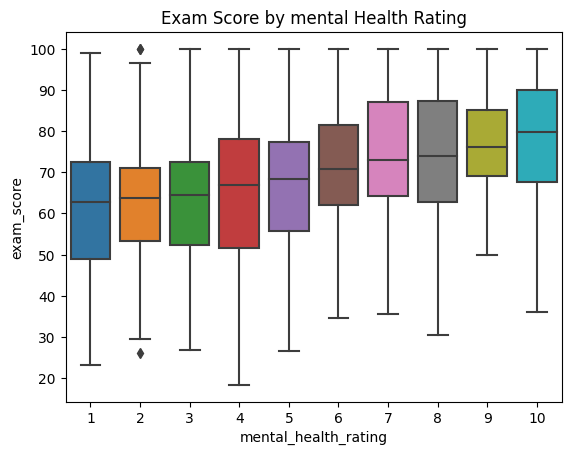

Correlation: 0.3215229306551463


In [26]:
sns.boxplot(data=data, x='mental_health_rating', y='exam_score')
plt.title("Exam Score by mental Health Rating")
plt.show()

print("Correlation:", data['mental_health_rating'].corr(data['exam_score']))

## 3. Is Social Media a Distraction or Unrelated to Grades?

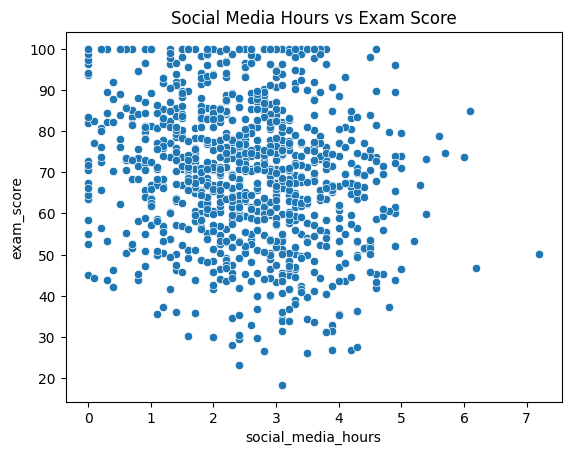

Correlation: -0.16673288510861667


In [27]:
sns.scatterplot(data=data, x='social_media_hours', y='exam_score')
plt.title("Social Media Hours vs Exam Score")
plt.show()

print("Correlation:", data['social_media_hours'].corr(data['exam_score']))

## 4. What Role Does Paternal Education or Internet Quality Play?

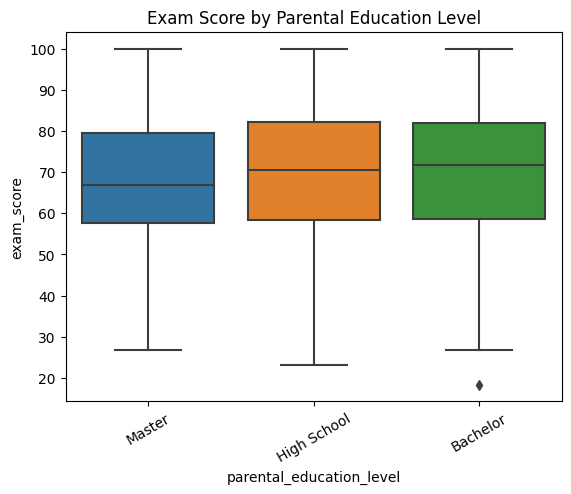

In [28]:
sns.boxplot(data=data, x='parental_education_level', y='exam_score')
plt.title("Exam Score by Parental Education Level")
plt.xticks(rotation=30)
plt.show()

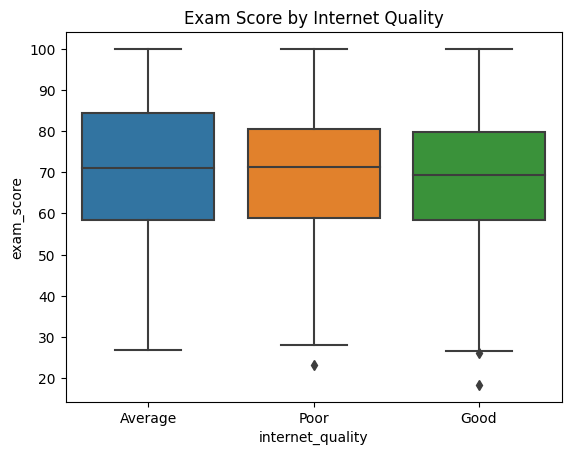

In [29]:
sns.boxplot(data=data, x='internet_quality', y='exam_score')
plt.title("Exam Score by Internet Quality")
plt.show()

In [30]:
data.sample(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,leisure_hours,mental_health_level
415,S1415,17,Male,3.4,1.2,2.1,Yes,88.8,5.3,Fair,4,High School,Average,4,Yes,68.3,3.3,Low
178,S1178,17,Other,2.9,2.5,2.4,Yes,83.7,6.3,Poor,5,High School,Good,9,No,65.2,4.9,High
490,S1490,24,Female,4.4,1.4,2.2,No,94.6,5.5,Good,3,Master,Good,2,Yes,63.6,3.6,Low
861,S1861,17,Male,3.9,1.9,0.2,No,82.4,8.4,Fair,4,Bachelor,Poor,9,Yes,93.5,2.1,High
867,S1867,22,Female,5.4,3.0,1.5,No,100.0,8.5,Poor,6,Bachelor,Good,2,No,94.5,4.5,Low


In [31]:
data.duplicated().sum()

0

In [32]:
# data.hist(figsize=(15, 10), bins=30)
# plt.tight_layout()
# plt.show()

In [33]:
data.dtypes

student_id                         object
age                                 int64
gender                             object
study_hours_per_day               float64
social_media_hours                float64
netflix_hours                     float64
part_time_job                      object
attendance_percentage             float64
sleep_hours                       float64
diet_quality                       object
exercise_frequency                  int64
parental_education_level           object
internet_quality                   object
mental_health_rating                int64
extracurricular_participation      object
exam_score                        float64
leisure_hours                     float64
mental_health_level              category
dtype: object

In [34]:
data = data.drop(columns=['student_id'])

## Categorical columns to Encode

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [36]:
for col in data.select_dtypes(include=['object', 'category']).columns:
    data[col] = le.fit_transform(data[col])

In [37]:
data.dtypes

age                                int64
gender                             int64
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                      int64
attendance_percentage            float64
sleep_hours                      float64
diet_quality                       int64
exercise_frequency                 int64
parental_education_level           int64
internet_quality                   int64
mental_health_rating               int64
extracurricular_participation      int64
exam_score                       float64
leisure_hours                    float64
mental_health_level                int64
dtype: object

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

## Define features (x) and target (y)

In [39]:
X = data.drop(columns=['exam_score'])
y = data['exam_score']

## Train-Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling (important for linear model)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train the Model

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

## Evaluate the Model

In [44]:
y_pred = lr.predict(X_test_scaled)

#metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 26.538155100073446
R2 Score: 0.8965087990636076


## Visualize Actual vs Predicted

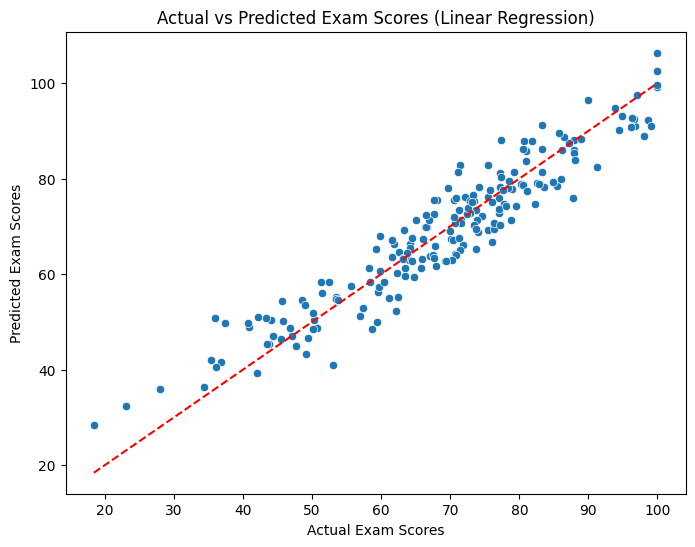

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

## Coefficients Analysis (Helps you interpret which features most influence exam scores, positively or negatively)

In [46]:
coefficients = pd.DataFrame(
    {
        'Feature': X.columns,
        'Coefficient': lr.coef_
    }
).sort_values(by='Coefficient', key=abs, ascending=False)

print(coefficients)

                          Feature   Coefficient
14                  leisure_hours  4.173358e+14
3              social_media_hours -3.003849e+14
4                   netflix_hours -2.809638e+14
2             study_hours_per_day  1.414991e+01
12           mental_health_rating  5.518433e+00
9              exercise_frequency  2.634983e+00
7                     sleep_hours  2.452003e+00
6           attendance_percentage  1.393293e+00
8                    diet_quality -2.751192e-01
10       parental_education_level -2.342831e-01
5                   part_time_job  1.617627e-01
0                             age  1.340548e-01
15            mental_health_level -1.161114e-01
1                          gender  7.363569e-02
11               internet_quality -3.117747e-02
13  extracurricular_participation -2.339440e-02


| **Feature**                        | **Interpretation**                                                                |
| ---------------------------------- | --------------------------------------------------------------------------------- |
| **leisure\_hours**                 |  Extremely high value — likely multicollinear; remove or revise feature.        |
| **social\_media\_hours**           | Strong negative impact on scores; excessive use may reduce academic performance.  |
| **netflix\_hours**                 | Negative influence; time spent watching shows may reduce focus on studies.        |
| **study\_hours\_per\_day**         | Positive impact; more study time leads to better exam scores.                     |
| **mental\_health\_rating**         | Better mental health is associated with higher exam scores.                       |
| **exercise\_frequency**            | Positive effect; exercise may improve concentration and well-being.               |
| **sleep\_hours**                   | More sleep generally helps improve academic performance.                          |
| **attendance\_percentage**         | Higher attendance correlates with better scores.                                  |
| **diet\_quality**                  | Slight negative effect; likely not significant on its own.                        |
| **parental\_education\_level**     | Slight negative impact; counterintuitive, possibly confounded by other variables. |
| **part\_time\_job**                | Slight positive effect; could reflect better time management.                     |
| **age**                            | Slightly positive influence; older students may be more mature or focused.        |
| **mental\_health\_level**          | Small negative impact; possibly due to encoding or overlap with other variables.  |
| **gender**                         | Very minimal effect; not a strong predictor of exam scores.                       |
| **internet\_quality**              | Little to no effect; may not strongly influence exam performance.                 |
| **extracurricular\_participation** | Negligible impact; not directly linked to academic scores in this case.           |


In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
X = data.drop(columns=["exam_score"])
y = data['exam_score']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [52]:
print(f"Random Forest RMSE: {rmse: .2f}")
print(f"Random Forest R2 Score: {r2: .4f}")

Random Forest RMSE:  6.11
Random Forest R2 Score:  0.8542


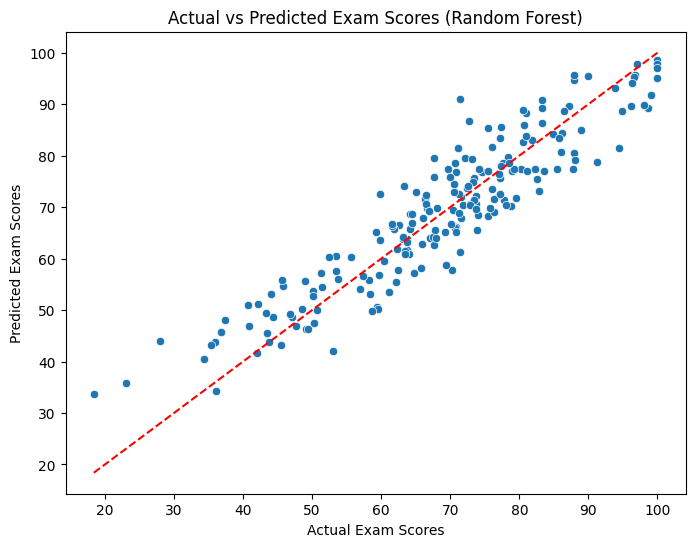

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

In [54]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

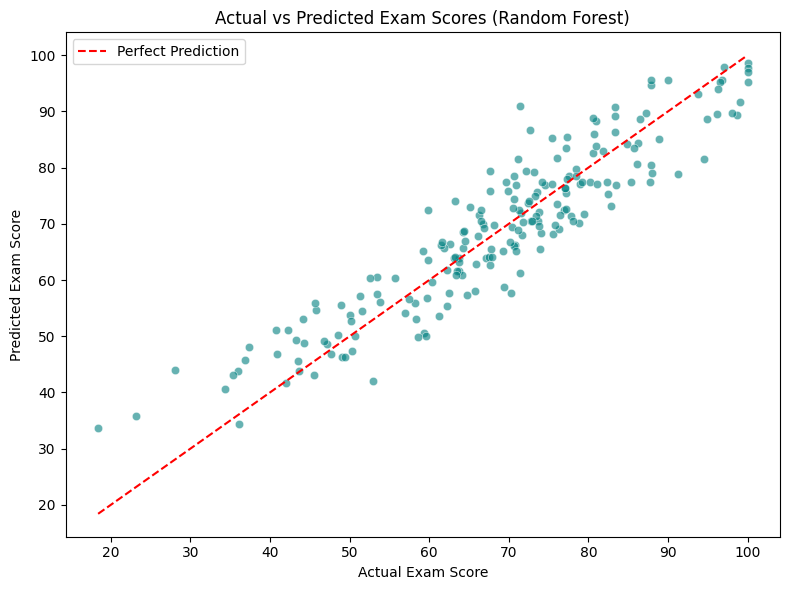

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, color='teal', alpha=0.6)
plt.plot([results_df.min().min(), results_df.max().max()],
        [results_df.min().min(), results_df.max().max()],
         'r--', label='Perfect Prediction')

plt.title('Actual vs Predicted Exam Scores (Random Forest)')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.legend()
plt.tight_layout()
plt.show()

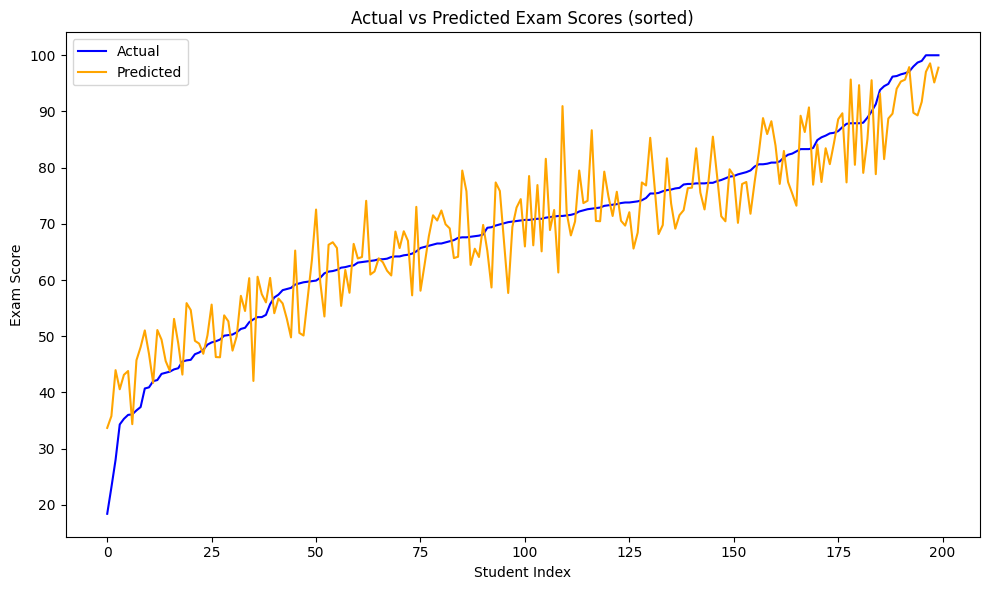

In [56]:
sorted_df = results_df.sort_values(by='Actual').reset_index(drop=True)

plt.figure(figsize=(10,6))
plt.plot(sorted_df['Actual'], label='Actual', color='blue')
plt.plot(sorted_df['Predicted'], label='Predicted', color='orange')
plt.title('Actual vs Predicted Exam Scores (sorted)')
plt.xlabel('Student Index')
plt.ylabel('Exam Score')
plt.legend()
plt.tight_layout()
plt.show()